In [48]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from scipy.ndimage import zoom
# import sys
# sys.path.append('../Plotting/')
# sys.path.append('../Fonts/')
# sys.path.append('../Helpers/')
# sys.path.append('../obj/')
# sys.path.append('../Images/')
# sys.path.append('../FigureData/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
!pwd

/nfs/Data/Notebooks/Plotting


In [50]:
import os
print(os.getcwd())
os.chdir('/nfs/Data/Notebooks/Plotting/')

/nfs/Data/Notebooks/Plotting


In [51]:
%matplotlib --list

# import matplotlib
# import matplotlib.pyplot as mpl
# import matplotlib.ticker
# import matplotlib.cm as cm

import MPLGUI as MP
%matplotlib inline

Available matplotlib backends: ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg', 'gtk', 'tk', 'inline']


In [52]:
from IPython.display import Markdown as md

md("matplotlib documentation for this version: https://matplotlib.org/{}/".format(MP.matplotlib.__version__))

matplotlib documentation for this version: https://matplotlib.org/1.5.3/

In [53]:
# Find Absolute Bounds
T = np.array([[np.min(x), np.max(x)] for x in DataSets.values()])
# if np.min(T) < 0.0:
#     ZLimAll = (0.0, np.max(T))
# else:
#     ZLimAll = (np.min(T), np.max(T))
ZLimAll = (np.min(T), np.max(T))
print(ZLimAll)

(-1.0, 0.410630044042544)


In [54]:
print("{} : {}".format(np.max(DataSets['AB']),np.where(DataSets['AB']==np.max(DataSets['AB']))))
print("{} : {}".format(np.max(DataSets['BA']),np.where(DataSets['BA']==np.max(DataSets['BA']))))

0.410630044043 : (array([8]), array([12]))
0.409333180927 : (array([5]), array([10]))


In [55]:
CurrentTimePoint

19260800.0

CPU times: user 13.3 s, sys: 708 ms, total: 14 s
Wall time: 14.2 s


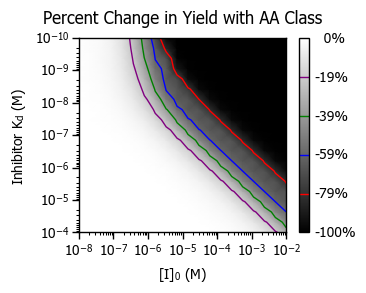

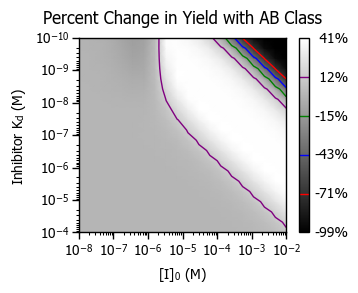

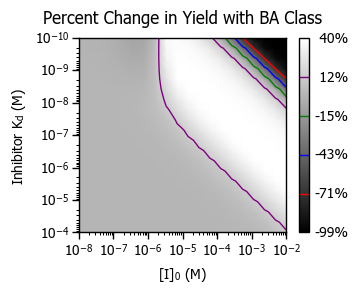

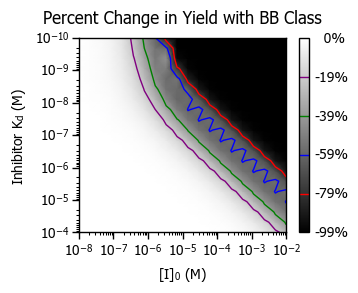

In [56]:
%%time

LinePlotDict = OrderedDict()
LinePlotDictXPoints = OrderedDict()

for DataSetType in DataSets.keys():
    # Figure Settings
    FigureDir   = "./Figures"
    Title       = "Percent Change in Yield with {} Class".format(DataSetType)
    ImgFileName = '{}/Contour-{} at {:.2f}.pdf'.format(FigureDir, Title, CurrentTimePoint)
    # XAxisLabel  = "[A{}] (M)".format(r"$\ \!_0$")
    # YAxisLabel  = "[B{}] (M)".format(r"$\ \!_0$")
    XAxisLabel  = r"$[I]_0$ (M)"
    YAxisLabel  = "Inhibitor "+r"$K_d$ (M)"

    # XAxisLabel  = 'X - Axis'
    # YAxisLabel  = 'Y - Axis'

    # PointCount = 5e2
    # XAxisPoints = np.logspace(np.log10(XLim[0]), np.log10(XLim[1]), PointCount)
    # YAxisPoints = np.logspace(np.log10(YLim[0]), np.log10(YLim[1]), PointCount)


    # Params
    ZoomFactor = 1
    RoundingFactor = 20
    # Generate Plot Data
    XAxisPoints = zoom(I0s,ZoomFactor)
    YAxisPoints = zoom(KDIs[::-1],ZoomFactor)
    XLim = [XAxisPoints[0], XAxisPoints[-1]]
    YLim = [YAxisPoints[0], YAxisPoints[-1]]
    ContourData = zoom(np.round(DataSets[DataSetType][::-1,:],RoundingFactor),ZoomFactor)*100.0
#     ContourData = zoom(DataSets[DataSetType][::-1,:], ZoomFactor)*100.0
    
    LinePlotDict[DataSetType] = np.diagonal(ContourData)
    LinePlotDictXPoints[DataSetType] = XAxisPoints/YAxisPoints
    ZLim = [np.min(ContourData), np.max(ContourData)]
#     ZLim = np.array(ZLimAll)*100.0
    Delta = (ZLim[1] - ZLim[0])
    ContourLevels = sorted([
            (1.0*Delta/5.0 + ZLim[0]),
            (2.0*Delta/5.0 + ZLim[0]),
            (3.0*Delta/5.0 + ZLim[0]),
            (4.0*Delta/5.0 + ZLim[0]),
    #         0.60,
    #         0.63,
    #         0.65,
            ])
#     ContourLevels = sorted([
#             100.0 * 0.80,
#             100.0 * 0.60,
#             100.0 * 0.40,
#             100.0 * 0.20,
#     #         0.60,
#     #         0.63,
#     #         0.65,
#             ])
#     Delta = ZLim[1] - ZLim[0]
#     ContourLevels = sorted([
#             100.0,
#             ZLim[0] + 1.0*Delta/4.0,
#             ZLim[0] + 2.0*Delta/4.0,
#             ZLim[0] + 3.0*Delta/4.0,
#     #         0.60,
#     #         0.63,
#     #         0.65,
#             ])

    MainPlot = MP.ContourPlot(
        Width="single",
    #     latex = False
        )

#     MainPlot.SetXRange(1e-6,XLim[1])
#     MainPlot.SetYRange(1e-6,YLim[1])
    MainPlot.SetXRange(XLim[0],XLim[1])
    MainPlot.SetYRange(YLim[0],YLim[1])

    XTicks = MainPlot._Plot.xaxis.get_major_ticks()
    YTicks = MainPlot._Plot.yaxis.get_major_ticks()

    # for Index in np.arange(0, len(XTicks),2):
    #     XTicks[Index].label1On = ""
    #     YTicks[Index].label1On = ""

    ColorMap = MP.mpl.cm.gray
#     ColorMap = MP.mpl.cm.seismic_r
#     ColorMap = MP.mpl.cm.gray_r
    
    ColorMap.set_bad('red',1.)

    ContourImage = MainPlot._Plot.pcolormesh(
        XAxisPoints,
        YAxisPoints,
        ContourData,
        cmap=ColorMap,
        shading = 'gouraud',
        rasterized = True,
        vmin=ZLim[0],
        vmax=ZLim[1]
    )

    ContourImage.autoscale()

    CLs = ContourLines =  MainPlot._Plot.contour(
        XAxisPoints,
        YAxisPoints,
        ContourData,
        ContourLevels,
        origin='lower',
        linewidths=1.0,
        colors=(
            'red',
            'blue',
            'green',
            'purple',
        )
    )

    # MainPlot._Plot.clabel(
    #     ContourLines,
    #     ContourLevels,
    #     inline=True,
    #     fmt='%.1f',
    #     fontsize=7,
    #     orientation='horizontal',
    #     rightside_up = True,
    #     inline_spacing = 30.0,
    # )

    Colorbar = MP.mpl.colorbar(
        ContourImage,
    #     ticklocation = [],
        ticks = [ZLim[0],ZLim[1]]+ContourLevels,
#         format = '%1.1f',
        format = '%3d%%',
        drawedges = False,
        orientation = 'vertical',
    #     shrink=0.8,
    #     extend='neither'
    )

    MainPlot._Plot.tick_params(
            which = 'major',
            pad = 1.5, # How far are the labels from the mark
        )
    Colorbar.ax.tick_params(which='both',length=0)
    # Colorbar.ax.set_xticks([ZLim[0],ZLim[1]]+ContourLevels)
    Colorbar.add_lines(CLs)
    # Colorbar.set_ticks(ContourLevels)
    Colorbar.update_ticks()

    MainPlot.Title(Title)
    MainPlot.XLabel(XAxisLabel)
    MainPlot.YLabel(YAxisLabel)

    MainPlot._MainFig.show()
    MainPlot.SaveFig(ImgFileName,
                     bbox_inches = 'tight',
                     transparent=True
                    )

    # MainPlot.DisallowLatex()


In [57]:
# Figure Settings
FigureDir   = "./Figures"
Title       = "Percent Change in Yield vs I0 over Kd".format(DataSetType)
ImgFileName = '{}/Line-{} at {:.2f}.pdf'.format(FigureDir, Title, CurrentTimePoint)

XAxisLabel  = r'$\frac{[I]_0}{K_d}$ '
# XAxisLabel  = r'$[I]_0K_d^{-1}$ '
YAxisLabel  = 'Percent Change in Yield'

# XAxisPoints = zoom(np.array(I0s)/np.array(KDIs[::-1]),ZoomFactor)
XAxisPoints = LinePlotDictXPoints.values()[0]

XLim = [np.min(XAxisPoints), np.max(XAxisPoints)]
# XLim = [1e3,1e4]

XBounds = (XLim[0] <= XAxisPoints) & (XAxisPoints <= XLim[1])
XAxisPoints = XAxisPoints[XBounds]

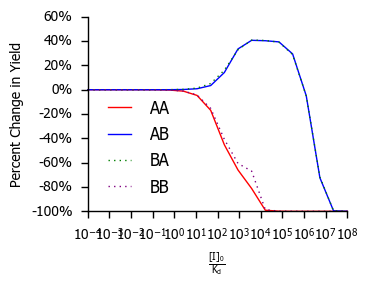

In [58]:
MainPlot = MP.LinePlot(
    Width="single",
    YAxisInPercent = True,
    )

MainPlot.AddLine(
    XAxisPoints,
    LinePlotDict["AA"]/100.0,
    label="AA",
    color="red",
    clip_on=False,
#     alpha=0.5,
    zorder=0,
    linestyle = '-'
    )
MainPlot.AddLine(
    XAxisPoints,
    LinePlotDict["AB"]/100.0,
    label="AB",
    color="blue",
    clip_on=False,
#     alpha=0.5,
    zorder=0,
    linestyle = '-'
    )
MainPlot.AddLine(
    XAxisPoints,
    LinePlotDict["BA"]/100.0,
    label="BA",
    color="green",
    clip_on=False,
#     alpha=0.5,
    zorder=1,
    linestyle = ':'
    )
MainPlot.AddLine(
    XAxisPoints,
    LinePlotDict["BB"]/100.0,
    label="BB",
    color="Purple",
    clip_on=False,
#     alpha=0.5,
    zorder=1,
    linestyle = ':'
    )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])


MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)

# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )

In [59]:
print(ContourLevels)

[-79.999830659876096, -59.999661319752235, -39.999491979628367, -19.999322639504499]


In [60]:
ZLimAll

(-1.0, 0.410630044042544)

In [61]:
print(I0s[-1])
print(KDIs[0])

0.01
1e-10


In [62]:
ParamData.keys()[:2]

['AA_Params_4.83e-03_2.07e-10', 'BA_Params_7.85e-07_7.85e-09']

In [63]:
# Figure Settings
FigureDir   = "./Figures"
Title       = "Yield vs Time".format(DataSetType)
ImgFileName = '{}/Line-{}-Double.pdf'.format(FigureDir, Title)

XAxisLabel  = 'Time (s)'
YAxisLabel  = 'Yield'

XAxisPoints = PossibleTimePoints

# XLim = [np.min(XAxisPoints), np.max(XAxisPoints)]
# XLim = [1e1, 1e8]
XLim = [10.0,np.max(XAxisPoints)]

XBounds = (XLim[0] <= XAxisPoints) & (XAxisPoints <= XLim[1])
XAxisPoints = XAxisPoints[XBounds]

A0 = 4e-6
B0 = 4e-6
I0 = I0s[16]
KDI = KDIs[17]

In [64]:
print(I0)
print(KDI)

0.00112883789168
2.33572146909e-05


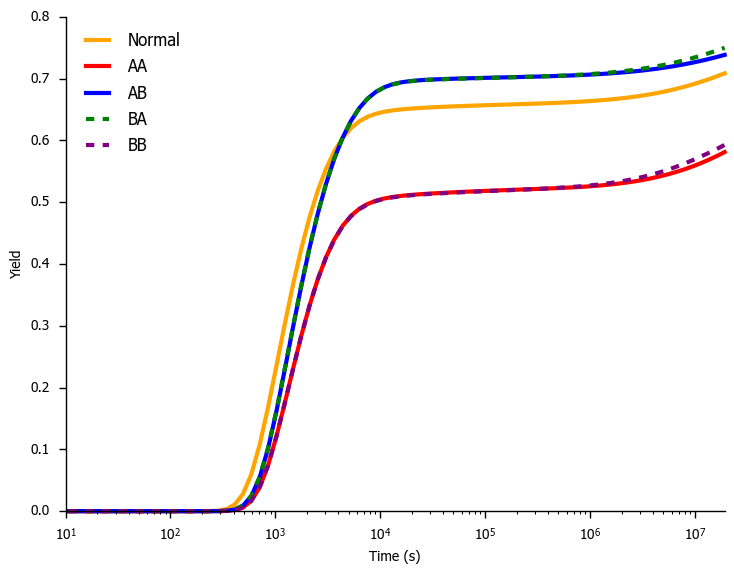

In [65]:
MainPlot = MP.LinePlot(
    Width="double",
    YAxisInPercent = False,
    )

MainPlot.AddLine(
    XAxisPoints,
    NoInhibitorValues[:,1][XBounds],
    label="Normal",
    color="orange",
    clip_on=False,
#     alpha=0.5,
    zorder=0,
    linestyle = '-',
    linewidth = 3.0
    )
MainPlot.AddLine(
    XAxisPoints,
    # Multiplied by No Inhibitor DataSet to remove relative yield.
#     ParamData["{}_Params_{:1.2e}_{:1.2e}".format('AA', float(I0), float(KDI))]['Result'][:,1][XBounds]*NoInhibitorValues[:,1][XBounds],
    ParamData["{}_Params_{:1.2e}_{:1.2e}".format('AA', float(I0), float(KDI))]['RawResult'][:,1][XBounds],
    label="AA",
    color="red",
    clip_on=False,
#     alpha=0.5,
    zorder=1,
    linestyle = '-',
    linewidth = 3.0
    )
MainPlot.AddLine(
    XAxisPoints,
    ParamData["{}_Params_{:1.2e}_{:1.2e}".format('AB', float(I0), float(KDI))]['RawResult'][:,1][XBounds],
    label="AB",
    color="blue",
    clip_on=False,
#     alpha=0.5,
    zorder=1,
    linestyle = '-',
    linewidth = 3.0
    )
MainPlot.AddLine(
    XAxisPoints,
    ParamData["{}_Params_{:1.2e}_{:1.2e}".format('BA', float(I0), float(KDI))]['RawResult'][:,1][XBounds],
    label="BA",
    color="green",
    clip_on=False,
#     alpha=0.5,
    zorder=2,
    linestyle = '--',
    linewidth = 3.0
    )
MainPlot.AddLine(
    XAxisPoints,
#     ParamData["{}_Params_{:1.2e}_{:1.2e}".format('BB', float(I0), float(KDI))]['Result'][:,1][XBounds]/NoInhibitorValues[:,1][XBounds],
    ParamData["{}_Params_{:1.2e}_{:1.2e}".format('BB', float(I0), float(KDI))]['RawResult'][:,1][XBounds],
    label="BB",
    color="purple",
    clip_on=False,
#     alpha=0.5,
    zorder=2,
    linestyle = '--',
    linewidth = 3.0
    )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])
# MainPlot.SetYRange(0.0,1.1)


MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)

# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )